# NLTK 자연어 처리 패키지

NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지이다.  
다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용된다.

NLTK 패키지가 제공하는 주요 기능은 다음과 같다.

* Corpus(말뭉치)
* Tokenizing(토큰 생성)
* Morphological Analysis(형태소 분석)
* Attachment of POS(품사 태깅)

## Corpus

말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다.  
단순히 소설, 신문 등의 문서를 모아놓은 것도 있지만 품사. 형태소, 등의 보조적 의미를 추가하고  
쉬운 분석을 위해 구조적인 형태로 정리해 놓은 것을 포함한다.   
NLTK 패키지의 `corpus` 서브패키지에서는 다양한 연구용 말뭉치를 제공한다.   
이 목록은 전체 corpus의 일부일 뿐이다. 말뭉치 자료는 설치시에 제공되지 않고 `download` 명령으로 사용자가 다운로드 받아야 한다.
`nltk.download("book")` 명령을 실행하면 NLTK 패키지 사용자 설명서에서 요구하는 대부분의 말뭉치를 다운로드 받아준다.

In [1]:
import nltk
nltk.download("book", quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


예를 들어 저작권이 말소된 문학작품을 포함하는 gutenberg 말뭉치에는 다음과 같은 작품이 샘플로 포함되어 있다.

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

이 중 제인 오스틴의 엠마 문서를 살펴보면 다음과 같이 원문 형태 그대로를 포함하고 있다.

In [3]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
#print(emma_raw)
print(emma_raw[:500])  #처음 시작되는 부분 500자를 출력
print('='*50)
print(emma_raw[-500:-1])  #마지막 끝나는 부분 500자를 출력
print(type(emma_raw), len(emma_raw))

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t

have no taste for finery or parade; and Mrs. Elton, from the
particulars detailed by her husband, thought it all extremely shabby,
and very inferior to her own.--"Very little white satin, very few
lace veils; a most pitiful business!--Selina would stare when she
heard of it."--But, in spite of these deficiencies, the wishes,
the hopes, the confidence, the predictions of the small band
of true friends who witnessed the ceremony, were fully answered
in the perfect happiness of the union.


FINIS

## Tokenizing

자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 한다.   
이 문자열 단위를 토큰(token)이라고 하고 이렇게 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라고 한다.   
영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 쓸 수 있다.

문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다.   
토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.

In [4]:
from nltk.tokenize import sent_tokenize  #문장 토큰

In [5]:
print(emma_raw[:1000]) #처음 1000자를 출력
print("="*50)
print(sent_tokenize(emma_raw[:1000])[0]) #처음 1000자를 문장 단위로 토큰화한 후, 그 중 첫번째 문장을 출력
print("="*50)
print(sent_tokenize(emma_raw[:1000])[1]) #처음 1000자를 문장 단위로 토큰화한 후, 그 중 두번째 문장을 출력
print("="*50)
print(sent_tokenize(emma_raw[:1000])[2]) #처음 1000자를 문장 단위로 토큰화한 후, 그 중 세번째 문장을 출력

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [6]:
from nltk.tokenize import word_tokenize #텍스트를 단어 단위로 토큰화
print(emma_raw[:300])  # 처음 300자를 출력
print(word_tokenize(emma_raw[:50]))  #처음 50자를 단어 단위로 토큰화하여 리스트로 출력
print("="*50)
print(word_tokenize(emma_raw[50:100]))  #처음 50번째 문자부터 100번째 문자 직전까지의 텍스트를 단어 단위로 토큰화하여 출력
print(type(word_tokenize(emma_raw)), len(word_tokenize(emma_raw)) )

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was t
['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I']
['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']
<class 'list'> 191776


In [7]:
from nltk.tokenize import RegexpTokenizer  #정규표현식을 활용한 토큰화
retokenize = RegexpTokenizer("[\w]+") #word를 표현하며 알파벳 + 숫자 + _ 중의 한 문자
print(retokenize.tokenize(emma_raw[:50])) #처음 50자를 retokenize 객체를 사용하여 토큰화한 결과를 출력
print(retokenize.tokenize(emma_raw[50:100])) #50번째 문자부터 100번째 문자 직전까지의 텍스트를 retokenize 객체를 사용하여 토큰화한 결과를 출력

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I']
['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']


## Morphological Analysis

형태소(morpheme)는 언어학에서 일정한 의미가 있는 가장 작은 말의 단위를 뜻한다.   
보통 자연어 처리에서는 토큰으로 형태소를 이용한다. 형태소 분석(morphological analysis)이란 단어로부터  
어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업이다.   
형태소 분석의 예로는 다음과 같은 작업이 있다.

* 어간 추출(stemming)
* 원형 복원(lemmatizing)
* 품사 부착(Part-Of-Speech tagging)

 ### 어간 추출과 원형 복원

어간 추출(stemming)은 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법이다.  
NLTK는 `PorterStemmer`  `LancasterStemmer` 등을 제공한다.   
어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않는다.

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer  #단어들의 어간(stem) 추출

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


원형 복원(lemmatizing)은 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업이다.   
품사(part of speech)를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

In [9]:
from nltk.stem import WordNetLemmatizer  #동사의 표제어(Lemma)를 추출

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]  #입력된 단어 w를 동사로 인식하여 표제어를 추출

['fly', 'fly', 'fly', 'fly', 'fly']

## Attachment of POS

품사(POS, part-of-speech)는 낱말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것이다.  
품사의 구분은 언어마다 그리고 학자마다 다르다.   
예를 들어 NLTK에서는 펜 트리뱅크 태그세트(Penn Treebank Tagset)라는 것을 이용한다.   
다음은 펜 트리뱅크 태그세트에서 사용하는 품사의 예이다.

* NNP: 단수 고유명사
* VB: 동사
* VBP: 동사 현재형
* TO: to 전치사
* NN: 명사(단수형 혹은 집합형)
* DT: 관형사

`nltk.help.upenn_tagset` 명령으로 자세한 설명을 볼 수 있다.

In [10]:
nltk.help.upenn_tagset("VB") #"VB" 태그에 대한 설명과 예시 단어들이 출력

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [11]:
nltk.help.upenn_tagset("NNP")  #"NNP" 태그에 대한 설명과 예시 단어들이 출력

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


`pos_tag` 명령을 사용하면 단어 토큰에 품사를 부착하여 튜플로 출력한다.   
다음 예문에서 refuse, permit이라는 같은 철자의 단어가 각각 동사와 명사로 다르게 품사 부착된 것을 볼 수 있다.

In [12]:
from nltk.tag import pos_tag  #문장 내의 각 단어에 해당하는 품사를 태깅
sentence = "Emma refused to permit us to obtain the refuse permit"
# Emma 고유명사(NNP) / refused 동사 과거형 시제(VBD) / to 전치사(TO) /
# permit 동사 기본형(VB) / us 인칭대명사(PRP) / to 전치사(TO) /
# obtain 동사 기본형(VB) / the 한정사(DT) / refuse 명사 단수형(NN) / permit 명사 단수형(NN)
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

품사 태그 정보를 사용하면 명사인 토큰만 선택할 수 있다.

In [13]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"]
nouns_list

['refuse', 'permit']

`untag` 명령을 사용하면 태그 튜플을 제거할 수 있다.

In [14]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

Scikit-Learn 등에서 자연어 분석을 할 때는 같은 토큰이라도 품사가 다르면 다른 토큰으로 처리해야 하는 경우가 많은데  
이 때는 원래의 토큰과 품사를 붙여서 새로운 토큰 이름을 만들어 사용하면 철자가 같고 품사가 다른 단어를 구분할 수 있다.  

In [15]:
sentence #sentence 내용 출력

'Emma refused to permit us to obtain the refuse permit'

In [16]:
print(sentence)
print('='*50)
print(tagged_list)
print('='*50)

def tokenizer():  #품사 출력 형태 변경
    return ["/".join(p) for p in tagged_list]

tokenizer()

Emma refused to permit us to obtain the refuse permit
[('Emma', 'NNP'), ('refused', 'VBD'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]


['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

## Text

NLTK의 `Text` 클래스는 문서 분석에 유용한 여러가지 메서드를 제공한다. 토큰열을 입력하여 생성한다.

In [17]:
print(len(emma_raw)) #887,071 글자 수로 구성된 엠마 원본

887071


In [18]:
from nltk import Text

text = Text(retokenize.tokenize(emma_raw))  # emma_raw 텍스트를 토큰화

In [19]:
print(text)
print(type(text))
print(len(text))

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>
<class 'nltk.text.Text'>
161983


`plot` 메소드를 사용하면 각 단어(토큰)의 사용 빈도를 그래프로 그려준다.

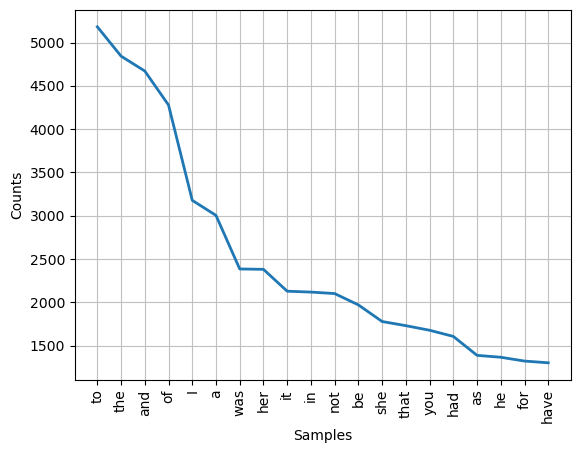

In [20]:
import matplotlib.pyplot as plt
text.plot(20)
plt.show()

`dispersion_plot` 메서드는 단어가 사용된 위치를 시각화한다.   
소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

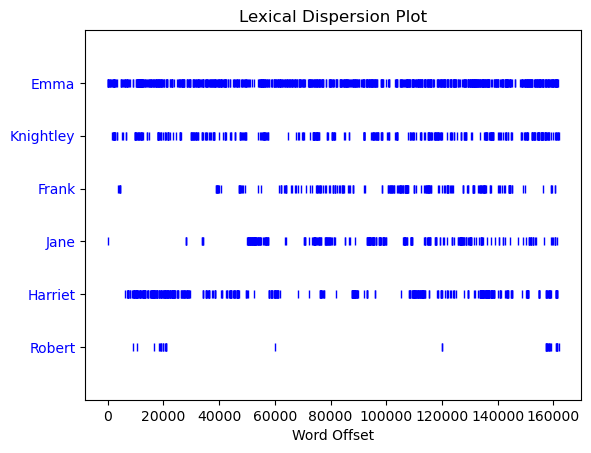

In [21]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])  #주어진 단어들이 텍스트 내에서 어떻게 분포되어 있는지 시각화
#Colab의 경우 그래프가 역으로 출력되는 문제 발생, JupyterNotebook 사용 권장!!

`concordance` 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다.   
여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

In [22]:
text.concordance("Emma")  #텍스트 내에서 특정 단어 Emma의 출현 위치와 그 주변 내용을 출력

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

## FreqDist

`FreqDist` 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.  
`Text` 클래스의 `vocab` 메서드로 추출할 수 있다.

In [23]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [24]:
fd

FreqDist({'to': 5183, 'the': 4844, 'and': 4672, 'of': 4279, 'I': 3178, 'a': 3004, 'was': 2385, 'her': 2381, 'it': 2128, 'in': 2118, ...})

또는 다음처럼 토큰 리스트를 넣어서 직업 만들 수도 있다.  
다음 코드에서는 Emma 말뭉치에서 사람의 이름만 모아서 `FreqDist` 클래스 객체를 만들었다.   
품사 태그에서 `NNP`(고유대명사)이면서 필요없는 단어(stop words)는 제거하였다.

In [25]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [26]:
fd_names

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

`FreqDist` 클래스는 단어를 키(key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다.   
다음 코드는 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [27]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")
#전체 단어의 수, "Emma"라는 단어의 출현 횟수, "Emma"라는 단어의 출현 확률

(7863, 830, 0.10555767518758744)

`most_common` 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [28]:
fd_names.most_common(10)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208)]

## WordCloud

wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud) 시각화를 할 수 있다.

In [29]:
mc_fd_names = dict(fd_names.most_common(20))  #딕셔너리 타입으로 변경
mc_fd_names

{'Emma': 830,
 'Harriet': 491,
 'Weston': 439,
 'Knightley': 389,
 'Elton': 385,
 'Woodhouse': 304,
 'Jane': 299,
 'Fairfax': 241,
 'Churchill': 223,
 'Frank': 208,
 'Hartfield': 160,
 'Oh': 156,
 'Bates': 141,
 'Highbury': 123,
 'John': 90,
 'Randalls': 89,
 'Smith': 89,
 'Martin': 85,
 'No': 79,
 'Perry': 79}

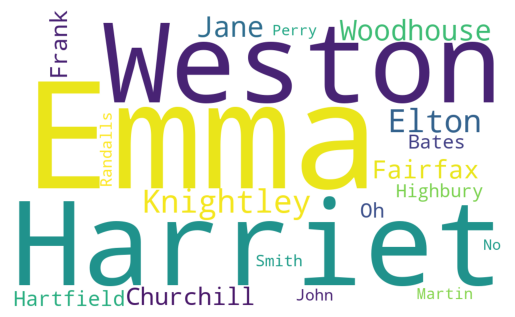

In [30]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
#plt.imshow(wc.generate_from_frequencies(fd_names)) #전체 출력
plt.imshow(wc.generate_from_frequencies(mc_fd_names )) #10개 출력
plt.axis("off")
plt.show()